So far we've covered decision trees growing with an entropy criterion. In doing so, however, we glossed over how that would actually work. In this assignment we'll give more detail into how an algorithm to do that would practically function.

Here we'll cover one popular algorithm for building a decision tree using entropy and information gain: **ID3**.

## The ID3 Algorithm

ID3 stands for _Iterative Dichotomizer 3_, and is one of the simplest ways to create a decision tree. It can be generalized into more robust scenarios, but the implementation is based on the framework we'll go over here. Essentially ID3 goes through every feature to find the most valuable attribute and then splits based on it. It moves further and further down the tree until it either has a pure class or has met a terminating condition. We'll cover the details below.

Before you can start working with ID3, however, there are some requirements for the data in this most basic form. Firstly, outcomes have to be binary. The simplest version of ID3 is a binary classifier. The attributes we're using to build the tree also have to be categorical. Attributes can have many categories but they must be known and countable.

If those two criteria are met then you can build a basic ID3 classifying algorithm.

The other thing we'll need for this is our definition of entropy. Recall from the previous assignment that we're going to use Shannon Entropy $H$, defined as:

$$ H = -\sum_{i=1}^n P(x_i)log_2 P(x_i) $$

For simplicity of calculation, we're actually going to do a slight transform on this definition. Recall from a (quite possibly long ago) algebra class that you can bring exponentials out to the front of a logarithm. In this case we'll raise the probability to -1, changing the formula to:

$$ H = \sum_{i=1}^n P(x_i)log_2 \frac{1}{P(x_i)} $$

This removes the negative sign up front and will make it easier for us to implement this formula.

## Calculating Entropy

Since this algorithm is based on entropy let's go over a quick example of how to calculate it.

Let's say we have 20 students, and we're trying to classify them as male and female. The only attribute we have is whether their height is tall, medium, or short. Of the 20 students, 12 are boys with and 8 are girls. Of the 12 boys, 4 are tall, 6 are medium and 2 are short. Of the 8 girls, 1 is tall, 2 are medium, and 5 are short.

What is the entropy, both before any rule is applied and then after applying a rule for being tall?

The initial entropy is just the formula plugged in over both the possible classes of interest:

$$ H = P(male)*log_2 \frac{1}{P(male)} + P(female)*log_2 \frac{1}{P(female)}  $$


$$ = \frac{12}{20}*log_2 \frac{20}{12} + \frac{8}{20}*log_2 \frac{20}{8} = .971 $$

What if we apply the rule _height = short_? We need to calculate the weighted average of the two entropies, one for the short students and one for the non-short students.

$$ H(short) = P(male)*log_2 \frac{1}{P(male)} + P(female)*log_2 \frac{1}{P(female)}  $$

$$ = \frac{2}{7}*log_2 \frac{7}{2} + \frac{5}{7}*log_2 \frac{7}{5} = .863 $$

$$ H(not\_short) = P(male)*log_2 \frac{1}{P(male)} + P(female)*log_2 \frac{1}{P(female)}  $$

$$ = \frac{10}{13}*log_2 \frac{13}{10} + \frac{3}{13}*log_2 \frac{13}{3} = .779 $$

Note that all the probabilities here are conditional on the criteria we're assuming (short or not short). Now the weighted average of the two is just:

$$ P(short) * H(short) + P(not\_short) * H(not\_short) = \frac{7}{20} * .863 + \frac{13}{20} * .779 = .809 $$

So our entropy from this question would go from .971 to .809. That's an improvement. Use the space below to calculate the entropy of the other criteria, for we asked whether the students were tall or medium.

In [27]:
from math import log2
# 12:boys   8:girls .
# 12 boys   4: tall, 6: medium 2: short. 
# 8 girls   1: tall, 2: medium 5: short.
# Put your calculations below
short = 7/20
not_short = 13/20

medium = 8/20
not_medium = 12/20

tall = 5/20
not_tall = 15/20

# initial entropy

initial_entropy = 12/20 * log2(20/12) + 8/20 * log2(20/8)
print("Entropy: initial ", initial_entropy)

# height is short
height_short = 2/7 * log2(7/2) + 5/7 * log2(7/5)

height_not_short = 10/13 * log2(13/10) + 3/13 * log2(13/3)

print("Entropy: Is Short? ", short * height_short + not_short * height_not_short )

# height is medium
height_medium = 6/8 * log2(8/6) + 2/8 * log2(8/2)

height_not_medium = 6/12 * log2(12/6) + 6/12 * log2(12/6)

print("Entropy: Is Medium? ", medium * height_medium + not_medium * height_not_medium )

# height is tall

height_tall = 4/5 * log2(5/4) + 1/5 * log2(5/1)

height_not_tall = 8/15 * log2(15/8) + 7/15 * log2(15/7)

print("Entropy: Is Tall? ", tall * height_tall + not_tall * height_not_tall )

# Example solution is below here. Don't peek.

Entropy: initial  0.9709505944546687
Entropy: Is Short?  0.8086695932381761
Entropy: Is Medium?  0.9245112497836531
Entropy: Is Tall?  0.9280757477080679


In [31]:
# after splitting by Is Short, Split again by height=tall (on the left side)

not_tall = 8/13
tall = 5/13
height_not_tall = 6/8 * log2(8/6) + 2/8 * log2(8/2)
height_tall = 4/5 * log2(5/4) + 1/5 * log2(5/1)
print("Entropy: Is Tall? ", not_tall * height_tall + tall * height_not_tall )

# after splitting by Is Short, Split again by height=medium (on the left side)
not_medium = 5/13
medium = 8/13
height_not_medium = 4/5 * log2(5/4) + 1/5 * log2(5/1)
height_medium = 6/8 * log2(8/6) + 2/8 * log2(8/2)
print("Entropy: Is Medium? ", not_medium * height_medium + medium * height_not_medium )


Entropy: Is Tall?  0.7562934908765049
Entropy: Is Medium?  0.7562934908765049


In [2]:
# EXAMPLE SOLUTION

# Tall.
H_tall = 4 / 5 * log2(5 / 4) + 1 / 5 * log2(5 / 1)
H_not_tall = 8 / 15 * log2(15 / 8) + 7 / 15 * log2(15 / 7)

entropy_tall = 5 / 20 * H_tall + 15 / 20 * H_not_tall


# Medium.
H_medium = 6/8 * log2(8/6) + 2/8 * log2(8/2)
H_not_medium = 6/12 * log2(12/6) + 6/12 * log2(12/6)

entropy_medium = 8/20 * (H_medium) + 12/20 * (H_not_medium)

print(entropy_tall, entropy_medium)

0.9280757477080679 0.9245112497836531


You should have found entropies of .925 for medium and .928 for tall. Both of those entropies are higher. Now, we've previously said we want to prioritize questions with the most information gain. Which one of these would that be?

It would be asking if an individual is short. You should also note that for all possible questions, we're still comparing with the same initial entropy value. So one way of seeing which question has the most information gain is to find the one with the lowest entropy. This should make sense when we think of entropy as uncertainty. The less uncertainty after a question, the more information we gained.

## Pseudocoding the Algorithm

**Pseudocode** is the processes of writing the steps and logic you would implement in code, but in normal language rather than commands a programming language could execute. It can be a useful way to chart out how you want to build an algorithm and is a common topic for technical interviews. Here we'll use pseudocode to explain the ID3 algorithm.

Here is reasonable pseudocode for ID3, which we'll then follow up with an explanation of the steps. The outcome for this variable will be A or B. An attribute is denoted a<sub>i</sub>. A value of that attribute is v<sub>i</sub>.


<pre>
Algorithm(Observations, Outcome, Attributes)
    Create a root node.
    If all observations are 'A', label root node 'A' and return.
    If all observations are 'B', label root node 'B' and return.
    If no attributes return the root note labeled with the most common Outcome.
    Otherwise, start:
        For each value v<sub>i</sub> of each attribute a<sub>i</sub>, calculate the entropy.
        The attribute a<sub>i</sub> and value v<sub>i</sub> with the lowest entropy is the best rule.
        The attribute for this node is then a<sub>i</sub>
            Split the tree to below based on the rule a<sub>i</sub> = v<sub>i</sub>
            Observations<sub>v<sub>i</sub></sub> is the subset of observations with value v<sub>i</sub>
            If Observations<sub>v<sub>i</sub></sub> is empty cap with node labeled with most common Outcome
            Else at the new node start a subtree (Observations<sub>v<sub>i</sub></sub>, Target Outcome, Attributes - {a<sub>i</sub>}) and repeat the algorithm
</pre>

Now let's walk through this pseudocode algorithm in plain English piece by piece.

First you create a root node. Simple enough, you have to start with something.

The next two lines say that if you're already exclusively one class, just label with that class and you're done. Similarly the following line says that if you don't have any attributes left you're also done, labeling with the most common outcome.

Then we get into the _real_ algorithm. First you have to find the best attribute by calculating entropies for all possible values. The attribute value pair with the lowest entropy is then the best attribute and the attribute you give to the node.

You use that rule to split the node, creating subsets of observations. There are then two new nodes, each with a subset of the observations corresponding to the rule. If obsevations are null then label with the dominant outcome.

Otherwise at each new node start the algorithm again.

This is how a decision tree would actually function. Understanding this should give you some insight into how this algorithm works and reveals several attributes of the algorithm. Firstly, the solution is not necessarily optimal. The tree can get stuck in local optima, just like with the gradient descent algorithm. It also has no way to work backwards if it finds itself in an informationless space. You can add criteria to make it stop before the tree has grown to run out of attributes or all leaf nodes are single classes.

## DRILL:

Look over the code for [this real](https://github.com/NinjaSteph/DecisionTree/blob/master/sna2111_DecisionTree/DecisionTree.py) ID3 Algorithm in python. Note how well the author breaks up functionality into individual, reusable, well-named helper functions. See if you can match our pseudocode steps to the code in this example.

In [25]:
import math

#find item in a list
def find(item, list):
    for i in list:
        if item(i): 
            return True
        else:
            return False

#find most common value for an attribute
def majority(attributes, data, target):
    #find target attribute
    valFreq = {}
    #find target in data
    index = attributes.index(target)
    #calculate frequency of values in target attr
    for tuple in data:
        if (tuple[index] in valFreq):
            valFreq[tuple[index]] += 1 
        else:
            valFreq[tuple[index]] = 1
    max = 0
    major = ""
    for key in valFreq.keys():
        if valFreq[key]>max:
            max = valFreq[key]
            major = key
    return major

#Calculates the entropy of the given data set for the target attr
def entropy(attributes, data, targetAttr):

    valFreq = {}
    dataEntropy = 0.0
    
    #find index of the target attribute
    i = 0
    for entry in attributes:
        if (targetAttr == entry):
            break
        ++i
    
    # Calculate the frequency of each of the values in the target attr
    for entry in data:
        if (entry[i] in valFreq):
            valFreq[entry[i]] += 1.0
        else:
            valFreq[entry[i]]  = 1.0

    # Calculate the entropy of the data for the target attr
    for freq in valFreq.values():
        dataEntropy += (-freq/len(data)) * math.log(freq/len(data), 2) 
        
    return dataEntropy

def gain(attributes, data, attr, targetAttr):
    """
    Calculates the information gain (reduction in entropy) that would
    result by splitting the data on the chosen attribute (attr).
    """
    valFreq = {}
    subsetEntropy = 0.0
    
    #find index of the attribute
    i = attributes.index(attr)

    # Calculate the frequency of each of the values in the target attribute(TGA: wrong, it should be split attribute)
    for entry in data:
        if (entry[i] in valFreq):
            valFreq[entry[i]] += 1.0
        else:
            valFreq[entry[i]]  = 1.0
    # Calculate the sum of the entropy for each subset of records weighted
    # by their probability of occuring in the training set.
    for val in valFreq.keys():
        valProb        = valFreq[val] / sum(valFreq.values())
        dataSubset     = [entry for entry in data if entry[i] == val]
        subsetEntropy += valProb * entropy(attributes, dataSubset, targetAttr)
        # TGA:
        # if attr is (short) and targetAttr is (sex) and if it is our first split
        # first iteration of the loop is like below
        #subsetEntropy +=short * (2/7 * log2(7/2) + 5/7 * log2(7/5))
        # second iteration of the loop is like below
        #subsetEntropy += not_short * (10/13 * log2(13/10) + 3/13 * log2(13/3))
        # the sum inside the brackets is done by entropy function defined above
        
    # Subtract the entropy of the chosen attribute from the entropy of the
    # whole data set with respect to the target attribute (and return it)
    # TGA: perfect!! compare previous entropy with the entropy we obtain after splitting by attr
    return (entropy(attributes, data, targetAttr) - subsetEntropy)

#choose best attibute 
def chooseAttr(data, attributes, target):
    best = attributes[0]
    maxGain = 0;
    for attr in attributes:
        newGain = gain(attributes, data, attr, target) 
        if newGain > maxGain:
            maxGain = newGain
            best = attr
    return best,maxGain

#get values in the column of the given attribute 
def getValues(data, attributes, attr):
    index = attributes.index(attr)
    values = []
    for entry in data:
        if entry[index] not in values:
            values.append(entry[index])
    return values

def getExamples(data, attributes, best, val):
    examples = [[]]
    index = attributes.index(best)
    for entry in data:
        #find entries with the give value
        if (entry[index] == val):
            newEntry = []
            #add value if it is not in best column
            for i in range(0,len(entry)):
                if(i != index):
                    newEntry.append(entry[i])
            examples.append(newEntry)
    examples.remove([])
    return examples

def makeTree(data, attributes, target, recursion):
    recursion += 1
    #Returns a new decision tree based on the examples given.
    data = data[:]
    vals = [record[attributes.index(target)] for record in data]
    default = majority(attributes, data, target)

    # If the dataset is empty or the attributes list is empty, return the
    # default value. When checking the attributes list for emptiness, we
    # need to subtract 1 to account for the target attribute.
    if not data or (len(attributes) - 1) <= 0:
        return default
    # If all the records in the dataset have the same classification,
    # return that classification.
    elif vals.count(vals[0]) == len(vals):
        return vals[0]
    else:
        # Choose the next best attribute to best classify our data
        best,maxgain = chooseAttr(data, attributes, target)
        # Create a new decision tree/node with the best attribute and an empty
        # dictionary object--we'll fill that up next.
        print(maxgain)
        tree = {best:{}}
    
        # Create a new decision tree/sub-node for each of the values in the
        # best attribute field
        for val in getValues(data, attributes, best):
            # Create a subtree for the current value under the "best" field
            examples = getExamples(data, attributes, best, val)
            newAttr = attributes[:]
            newAttr.remove(best)
            subtree = makeTree(examples, newAttr, target, recursion)
    
            # Add the new subtree to the empty dictionary object in our new
            # tree/node we just created.
            tree[best][val] = subtree
    
    return tree


#### Testing the algorithm with some data

In [26]:
attributes =['Short','Medium', 'Tall', 'Sex']
target = 'Sex'
data = [(0,0,1,'M'),
        (1,0,0,'F'),
        (0,1,0,'F'),
        (1,0,0,'M'),
        (0,0,1,'M'),
        (1,0,0,'F'),
        (0,1,0,'M'),
        (0,1,0,'F'),
        (0,1,0,'M'),
        (0,1,0,'M'),
        (0,0,1,'F'),
        (0,1,0,'M'),
        (0,1,0,'M'),
        (0,0,1,'M'),
        (1,0,0,'F'),
        (1,0,0,'M'),
        (1,0,0,'F'),
        (0,0,1,'M'),
        (1,0,0,'F'),
        (0,1,0,'M')]
tree = makeTree(data, attributes, target,0)
print(tree)

0.934068055375491
0.961236604722876
0
0
0
0
{'Short': {0: {'Medium': {0: {'Tall': {1: 'M'}}, 1: {'Tall': {0: 'M'}}}}, 1: {'Medium': {0: {'Tall': {0: 'F'}}}}}}


In [22]:
# convert to dataframe 
import pandas as pd
data = pd.DataFrame(data, columns = ["Short", "Medium", "Tall", "Sex"]);
data.head(5)

,Short,Medium,Tall,Sex
0,0,0,1,M
1,1,0,0,F
2,0,1,0,F
3,1,0,0,M
4,0,0,1,M


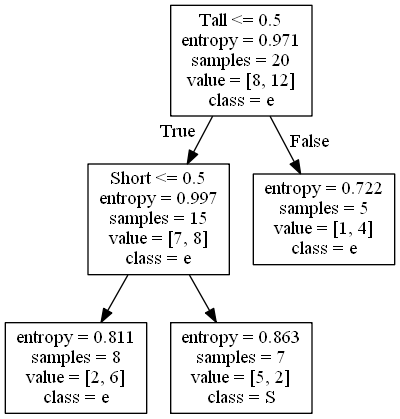

In [24]:
#use sklearn, graphviz and pydotplus to plot a decison tree
X = data[["Short","Medium","Tall"]]
Y = data[["Sex"]]
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=["Short","Medium","Tall"],
    class_names='Sex',
    filled=False
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())